## Importing required libraries 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('dark_background')
import seaborn as sns
sns.despine(right=True, top=True)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic-dataset/Titanic-Dataset.csv


<Figure size 640x480 with 0 Axes>

## Reading Dataset

In [2]:
#src: https://www.kaggle.com/datasets/yasserh/titanic-dataset
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
379,380,0,3,"Gustafsson, Mr. Karl Gideon",male,19.0,0,0,347069,7.7750,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.duplicated().sum()

0

No duplicate value here

### Treating with null values

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Let's check null values through visualization

Text(0.5, 1.0, 'Missing values')

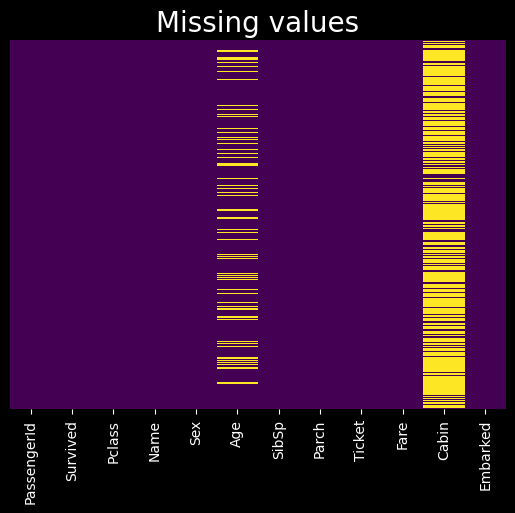

In [10]:
sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')
plt.title("Missing values", fontsize = 20)

## Filling null Age values

Text(0.5, 1.0, 'Age Distribution by Passenger Class')

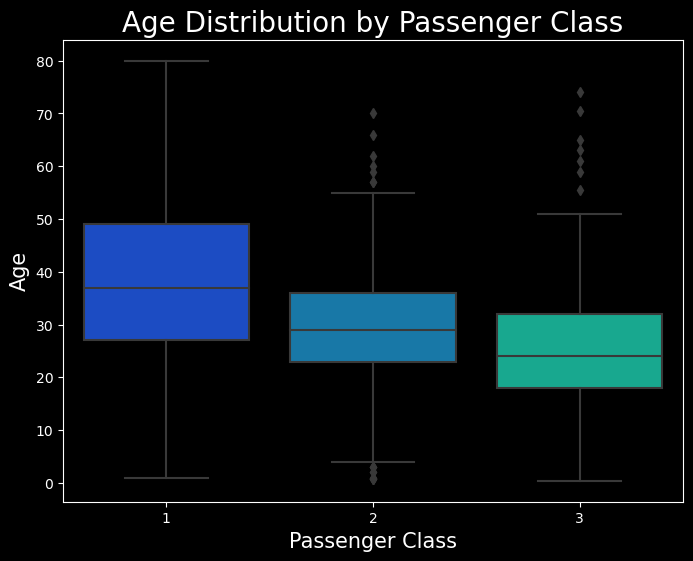

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Pclass', y='Age', palette='winter')
plt.xlabel("Passenger Class", fontsize=15)
plt.ylabel("Age", fontsize=15)
plt.title("Age Distribution by Passenger Class", fontsize=20)

In [12]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isna(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

#### Dropping 'Cabin' field as it has too many null values and this filed is not going to be used in this analysis

In [14]:
df.drop('Cabin', axis=1, inplace=True)

#### Filling Mode value in Embarked field missing values

In [15]:
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(mode_embarked)

In [16]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##### All missing values are treated

#### Data is clean now😀

### Exploring Different columns

In [17]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [18]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  , 24.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 29.  , 31.  , 34.  , 15.  ,
       28.  ,  8.  , 19.  , 40.  , 37.  , 66.  , 42.  , 21.  , 18.  ,
        3.  ,  7.  , 49.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  ,
       32.  , 16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 46.  , 59.  ,
       71.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [21]:
df.Age.value_counts().head()

24.0    166
37.0     36
29.0     31
22.0     27
18.0     26
Name: Age, dtype: int64

In [22]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
df.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [25]:
df.Fare.value_counts().head()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
Name: Fare, dtype: int64

In [26]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### Analysis

/tmp/ipykernel_415/3887586787.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


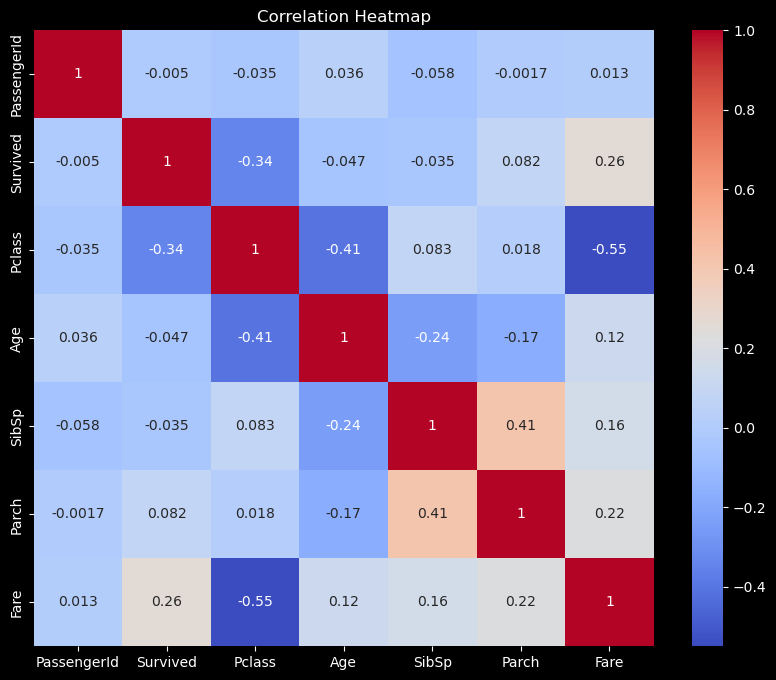

In [27]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Survival Count

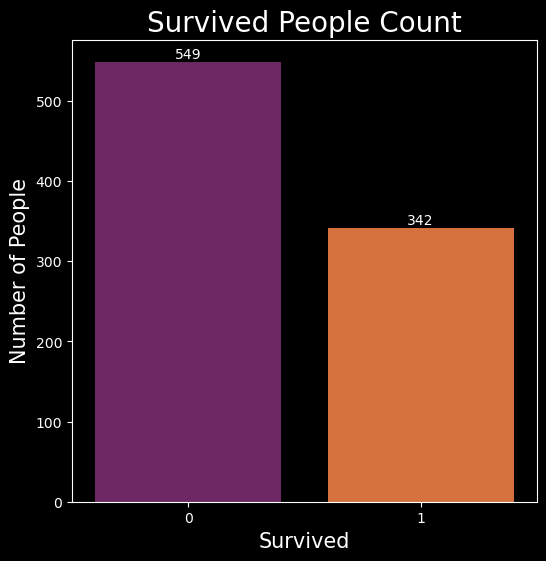

In [28]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x='Survived', data=df, palette = 'inferno')
plt.xlabel("Survived", fontsize=15)
plt.ylabel("Number of People", fontsize=15)
plt.title("Survived People Count", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

##### This shows that majority of people didn't survive

### Gender distribution

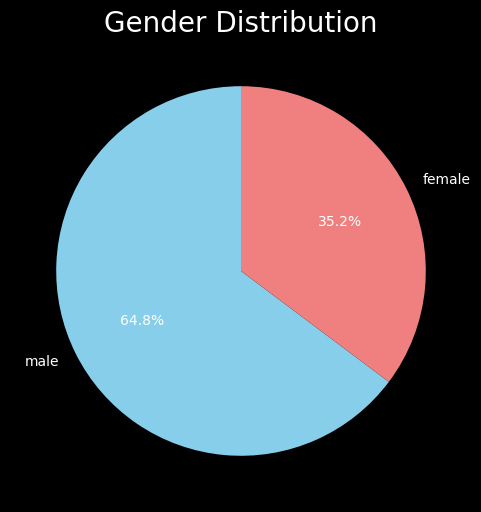

In [29]:
gender_counts = df['Sex'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Gender Distribution", fontsize=20)
plt.show()

##### Most of the passengers were male

### Survival count by Gender

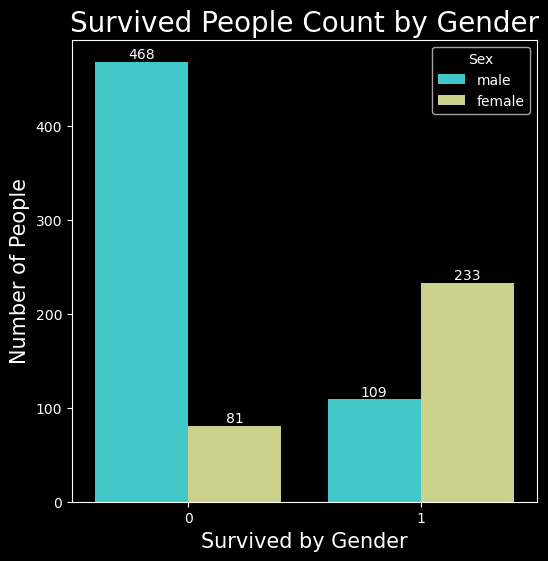

In [30]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x='Survived', data=df, hue='Sex', palette='rainbow')
plt.xlabel("Survived by Gender", fontsize=15)
plt.ylabel("Number of People", fontsize=15)
plt.title("Survived People Count by Gender", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

##### Survival ratio for female is higher than male

### People count by Passenger class

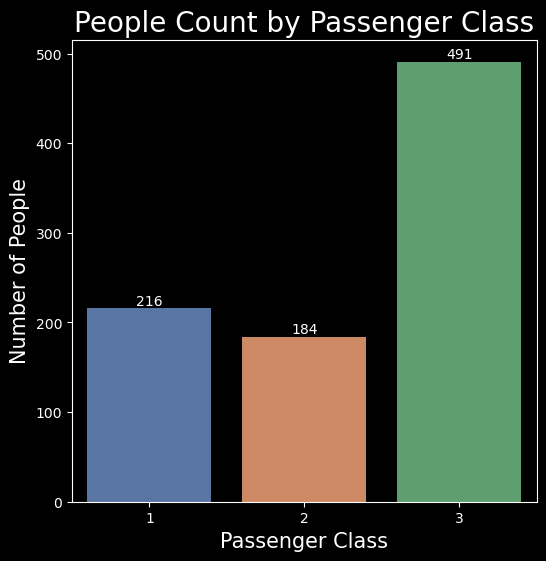

In [31]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Pclass', data=df, palette='deep')
plt.xlabel("Passenger Class", fontsize=15)
plt.ylabel("Number of People", fontsize=15)
plt.title("People Count by Passenger Class", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

##### Majority of people were from class 3

### People count by Passenger class and Gender

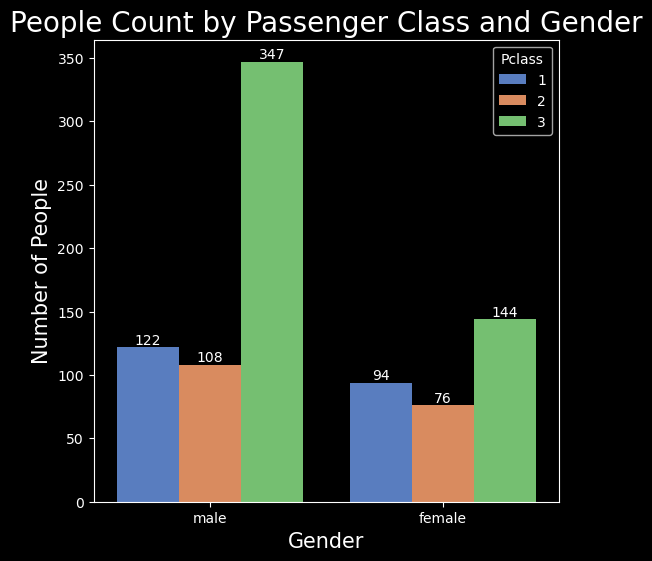

In [32]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Sex', data=df, hue='Pclass', palette='muted')
plt.xlabel("Gender", fontsize=15)
plt.ylabel("Number of People", fontsize=15)
plt.title("People Count by Passenger Class and Gender", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

##### Count of male is higher in each class and for class 3 it is more than double

### Count of people based on Survival status and Passenger class

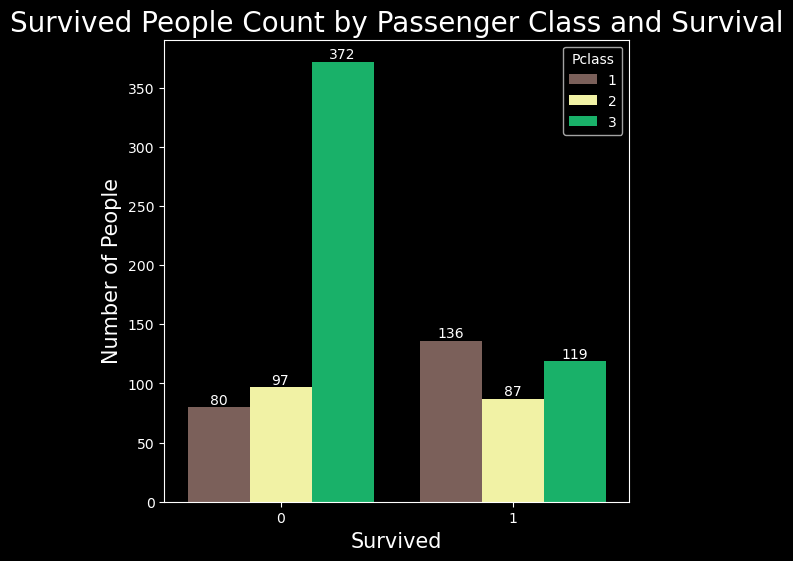

In [33]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Survived', data=df, hue='Pclass', palette='terrain_r')
plt.xlabel("Survived", fontsize=15)
plt.ylabel("Number of People", fontsize=15)
plt.title("Survived People Count by Passenger Class and Survival", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

##### Majority of the people from class 3 didn't survive and this number is too high comparatively

### Fare Distribution

Text(0.5, 1.0, 'Fare Distribution')

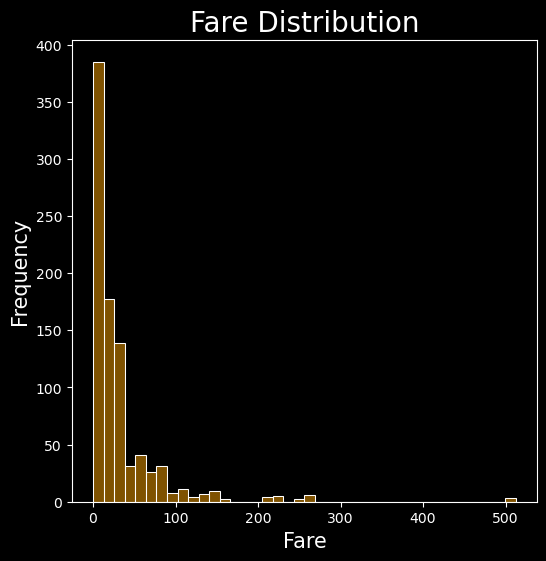

In [34]:
plt.figure(figsize=(6, 6))
sns.histplot(data=df, x='Fare', bins=40, color='orange', kde=False, alpha=0.5)
plt.xlabel("Fare", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Fare Distribution", fontsize=20)

### Age Distribution

Text(0.5, 1.0, 'Age Distribution')

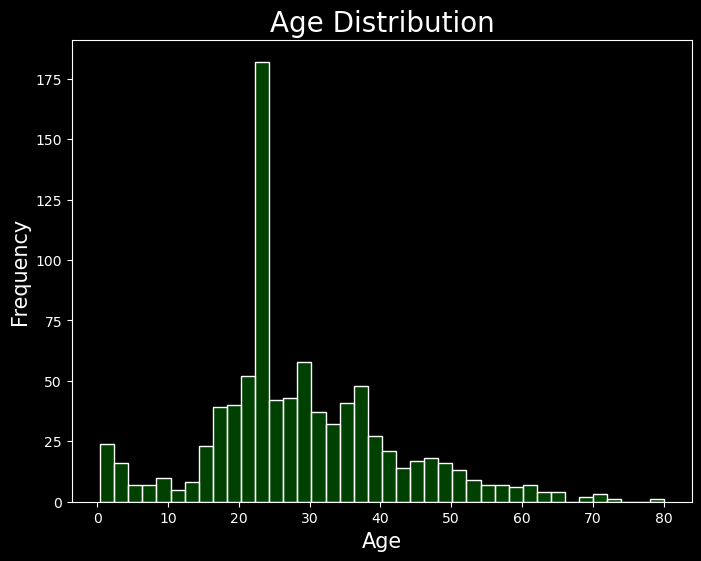

In [35]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df, x='Age', bins=40, color='green', kde=False, alpha=0.5)
plt.xlabel("Age", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.title("Age Distribution", fontsize=20)

##### Majority of the passengers from Age of 20 to 30

### Siblings Count

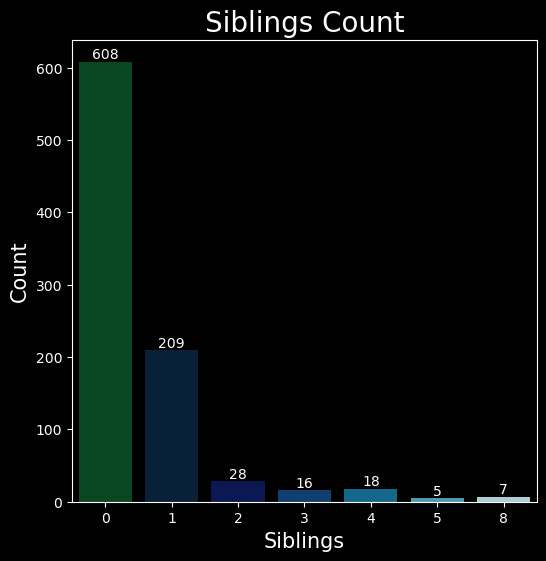

In [36]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x='SibSp', data=df, palette = 'ocean')
plt.xlabel("Siblings", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Siblings Count", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

##### Most of the passengers didn't have siblings

### Embarked count

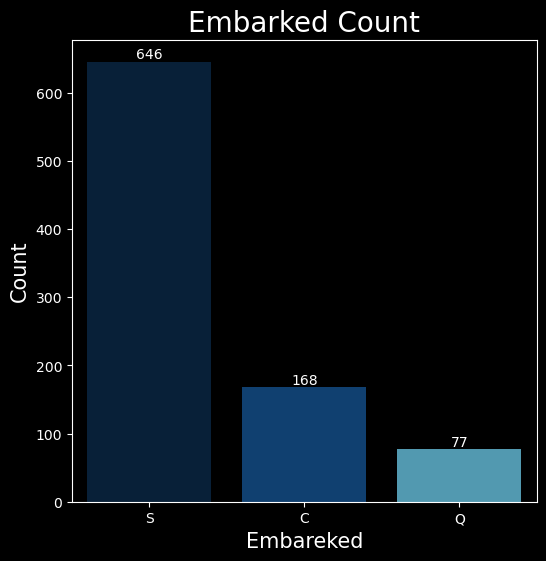

In [37]:
plt.figure(figsize = (6,6))
ax = sns.countplot(x='Embarked', data=df, palette = 'ocean')
plt.xlabel("Embareked", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Embarked Count", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

##### Most of the passengers were embarked from port S

## Insights

* ajority of people didn't survive
* Most of the passengers were male
* Survival ratio for female is higher than male
* Majority of people were from class 3
* Count of male is higher in each class and for class 3 it is more than double
* Majority of the people from class 3 didn't survive and this number is too high comparatively
* Majority of the passengers from Age of 20 to 30
* Most of the passenger's didn't have siblings
* Most of the passengers were embarked from port S